In [168]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score

In [169]:
dt = DecisionTreeClassifier(criterion='gini')
rf = RandomForestClassifier(criterion='gini')

In [213]:
train_df = pd.read_csv('../titanic/train.csv')
test_df = pd.read_csv('../titanic/test.csv')
combine = [train_df, test_df]
X_train = train_df.drop(['Survived','Ticket', 'Cabin','Name', 'PassengerId'], axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop(['PassengerId','Ticket', 'Cabin','Name'], axis=1)
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [214]:
freq_port_embark = train_df.Embarked.dropna().mode()[0]
X_test['Embarked'] = X_test['Embarked'].fillna(freq_port_embark)
X_train['Embarked'] = X_train['Embarked'].fillna(freq_port_embark)
freq_port_age = train_df.Age.dropna().mode()[0]
X_test['Age'] = X_test['Age'].fillna(freq_port_age)
X_train['Age'] = X_train['Age'].fillna(freq_port_age)

In [215]:
X_train['Sex'] = X_train['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
X_train['Embarked'] = X_train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
X_test['Sex'] = X_test['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
X_test['Embarked'] = X_test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [216]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [217]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


In [218]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int32  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(3)
memory usage: 41.9 KB


In [219]:
dt.fit(X_train,Y_train)
Y_pred = dt.predict(X_test)
acc_log = round(dt.score(X_train, Y_train) * 100, 2)
acc_log

98.09

(7,)


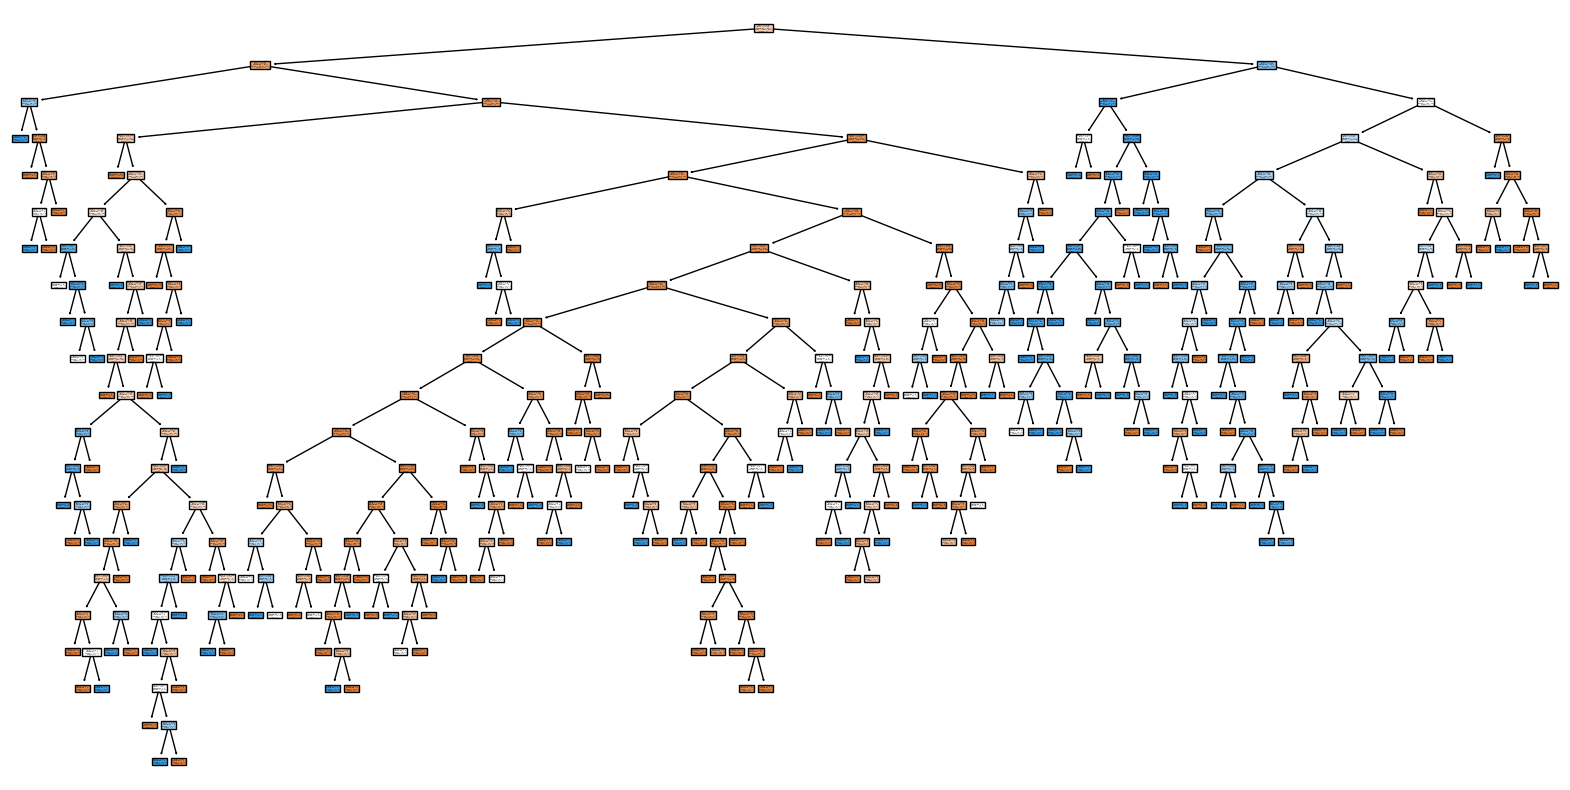

In [230]:
featurenames = np.array(X_train.columns.values)
print(featurenames.shape)
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=featurenames, class_names=np.array(['0','1']))
plt.show()

In [221]:
scores_dt = cross_val_score(dt, X_train, Y_train, cv=5)
print("the average accuracy for decision tree is: {}".format(scores_dt.sum()/5))

the average accuracy for decision tree is: 0.780051471972883


In [222]:
score_rf = cross_val_score(rf, X_train, Y_train, cv=5)
print("the average accuracy for random forest is: {}".format(score_rf.sum()/5))

the average accuracy for random forest is: 0.8081099742640134
